In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
from geowrangler.datasets import geofabrik


import matplotlib.pyplot as plt
import seaborn as sns
import folium

from pathlib import Path

/home/abbymoreno/miniconda3/envs/lacuna-fund/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Compare multiple years of OSM Data

OSM Years to compare: 2014, 2017, 2020, 2022

## Set directories

In [3]:
OUTPUT_DIR = Path("../../../data/04-output/")
OSM_DIR = OUTPUT_DIR / "osm"

OSM_POI_2022 = OSM_DIR / "osm_poi_features_2022.csv"
OSM_POI_2020 = OSM_DIR / "osm_poi_features_2020.csv"
OSM_POI_2017 = OSM_DIR / "osm_poi_features_2017.csv"
OSM_POI_2014 = OSM_DIR / "osm_poi_features_2014.csv"

# raws
RAW_DIR = Path("../../../data/02-raw/")
OSM_RAW_DIR = RAW_DIR / "osm"
OSM_RAW_2022 = OSM_RAW_DIR / "philippines-220101-free.shp.zip"
OSM_RAW_2017 = OSM_RAW_DIR / "philippines-170101-free.shp.zip"
OSM_RAW_2014 = OSM_RAW_DIR / "philippines-140101-free.shp.zip"

## Load OSM datasets

In [4]:
drop_cols = ["Unnamed: 0"]

osm_2022 = pd.read_csv(OSM_POI_2022)
osm_2020 = pd.read_csv(OSM_POI_2020)
osm_2017 = pd.read_csv(OSM_POI_2017)
osm_2014 = pd.read_csv(OSM_POI_2014)

for df in [osm_2022, osm_2020, osm_2017, osm_2014]:
    df = df.drop(columns=drop_cols, inplace=True)

In [5]:
# combine them
combined_df = pd.concat([osm_2014, osm_2017, osm_2020, osm_2022])
# combined_df = pd.concat([osm_2022, osm_2020, osm_2017])
combined_df.head(2)

,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,ADM3_EN,ADM3_PCODE,ADM4_EN,ADM4_PCODE,osm_year,poi_count,...,osm_poi_toilet_count,osm_poi_toilet_nearest,osm_poi_recycling_count,osm_poi_recycling_nearest,osm_poi_waste_basket_count,osm_poi_waste_basket_nearest,osm_poi_wastewater_plant_count,osm_poi_wastewater_plant_nearest,osm_poi_waste_transfer_station_count,osm_poi_waste_transfer_station_nearest
0,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Lomboy,PH015518016,2014,0.0,...,0.0,9668.100164,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
1,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Tapuac,PH015518031,2014,17.0,...,0.0,10000.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0


In [6]:
combined_df.shape

(3516, 126)

## Check POI counts across the years

In [7]:
# get the count columns
count_cols = [col for col in combined_df.columns.tolist() if "_count" in col]

pd.set_option("display.max_columns", None)
# group by year
grouped = combined_df.groupby("osm_year")[count_cols].sum()
grouped

,poi_count,osm_poi_clinic_count,osm_poi_dentist_count,osm_poi_doctors_count,osm_poi_hospital_count,osm_poi_optician_count,osm_poi_pharmacy_count,osm_poi_atm_count,osm_poi_bank_count,osm_poi_college_count,osm_poi_community_centre_count,osm_poi_comms_tower_count,osm_poi_convenience_count,osm_poi_fire_station_count,osm_poi_kindergarten_count,osm_poi_lighthouse_count,osm_poi_market_place_count,osm_poi_park_count,osm_poi_public_building_count,osm_poi_police_count,osm_poi_school_count,osm_poi_shelter_count,osm_poi_supermarket_count,osm_poi_telephone_count,osm_poi_tower_count,osm_poi_town_hall_count,osm_poi_university_count,osm_poi_cable_count,osm_poi_compensator_count,osm_poi_connection_count,osm_poi_converter_count,osm_poi_generator_count,osm_poi_insulator_count,osm_poi_line_count,osm_poi_busbar_count,osm_poi_bay_count,osm_poi_minor_line_count,osm_poi_plant_count,osm_poi_pole_count,osm_poi_portal_count,osm_poi_substation_count,osm_poi_tower_count_y,osm_poi_transformer_count,osm_poi_exchange_count,osm_poi_connection_point_count,osm_poi_distribution_point_count,osm_poi_service_device_count,osm_poi_data_center_count,osm_poi_drinking_water_count,osm_poi_water_mill_count,osm_poi_water_tower_count,osm_poi_water_works_count,osm_poi_water_well_count,osm_poi_sanitary_dump_station_count,osm_poi_toilet_count,osm_poi_recycling_count,osm_poi_waste_basket_count,osm_poi_wastewater_plant_count,osm_poi_waste_transfer_station_count
osm_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,5207.0,0.0,6.0,51.0,88.0,4.0,202.0,53.0,501.0,50.0,19.0,8.0,201.0,35.0,105.0,0.0,0.0,13.0,171.0,90.0,436.0,20.0,116.0,12.0,36.0,150.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,19.0,0.0,1.0,0.0,30.0,1.0,4.0,0.0,0.0
2017,8152.0,0.0,38.0,51.0,55.0,15.0,366.0,174.0,699.0,52.0,36.0,12.0,523.0,36.0,112.0,1.0,0.0,15.0,132.0,107.0,463.0,42.0,162.0,9.0,16.0,120.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1.0,32.0,0.0,9.0,0.0,63.0,3.0,4.0,1.0,0.0
2020,10979.0,0.0,62.0,52.0,42.0,18.0,470.0,235.0,782.0,126.0,76.0,21.0,950.0,41.0,106.0,5.0,0.0,23.0,47.0,124.0,495.0,91.0,197.0,10.0,15.0,124.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,56.0,3.0,22.0,0.0,85.0,8.0,5.0,1.0,0.0
2022,11222.0,0.0,78.0,83.0,18.0,23.0,517.0,274.0,793.0,78.0,64.0,53.0,1047.0,39.0,104.0,5.0,22.0,13.0,30.0,121.0,264.0,85.0,205.0,7.0,11.0,116.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,60.0,5.0,43.0,0.0,90.0,46.0,4.0,1.0,0.0


In [25]:
grp_city_yr = combined_df.groupby(["ADM3_EN", "osm_year"])[
    "osm_poi_hospital_count"
].sum()
grp_city_yr

ADM3_EN              osm_year
Cagayan de Oro City  2014        14.0
                     2017         2.0
                     2020         2.0
                     2022         3.0
City of Mandaluyong  2014         2.0
                     2017         1.0
                     2020         0.0
                     2022         0.0
City of Muntinlupa   2014        10.0
                     2017         6.0
                     2020         3.0
                     2022         3.0
City of Navotas      2014         0.0
                     2017         0.0
                     2020         0.0
                     2022         0.0
Dagupan City         2014         8.0
                     2017         9.0
                     2020         9.0
                     2022         1.0
Davao City           2014        31.0
                     2017         7.0
                     2020         8.0
                     2022         4.0
Iloilo City          2014        10.0
                    

## Visualize POI count distributions

In [8]:
# Create a distribution plot (histogram) using Seaborn

year_palette = sns.color_palette("husl", n_colors=len(combined_df["osm_year"].unique()))


def compare_feature(feature, df=combined_df, bins=20, lim_ax=False, xmax=0):
    sns.set(style="whitegrid")

    plt.figure(figsize=(10, 6))
    ax = sns.histplot(
        data=df, x=feature, hue="osm_year", kde=True, bins=bins, palette=year_palette
    )

    osm_years = df["osm_year"].unique()
    legend_labels = [str(year) for year in osm_years]

    if lim_ax:
        ax.set_xlim(0, xmax)

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature} by OSM Year")

    # Show the plot
    plt.legend(title="OSM Year", labels=legend_labels)
    plt.show()

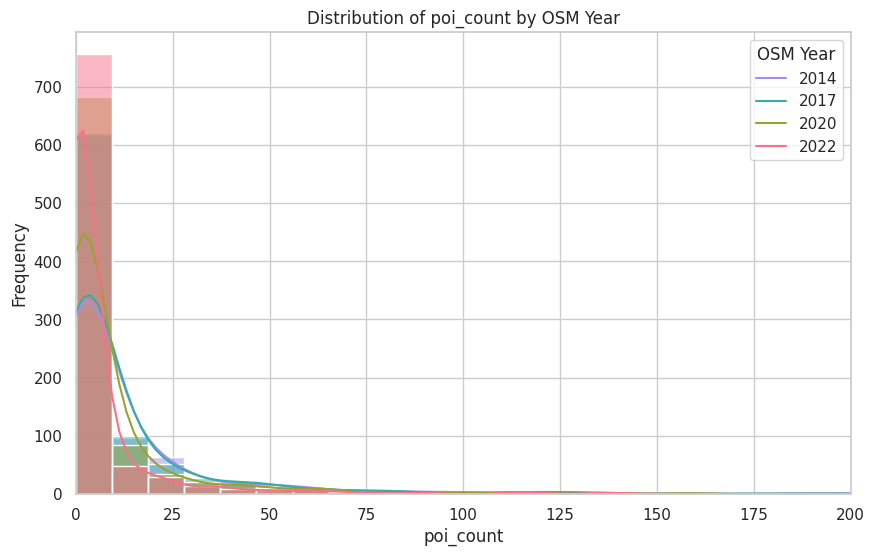

In [9]:
compare_feature("poi_count", bins=40, lim_ax=True, xmax=200)

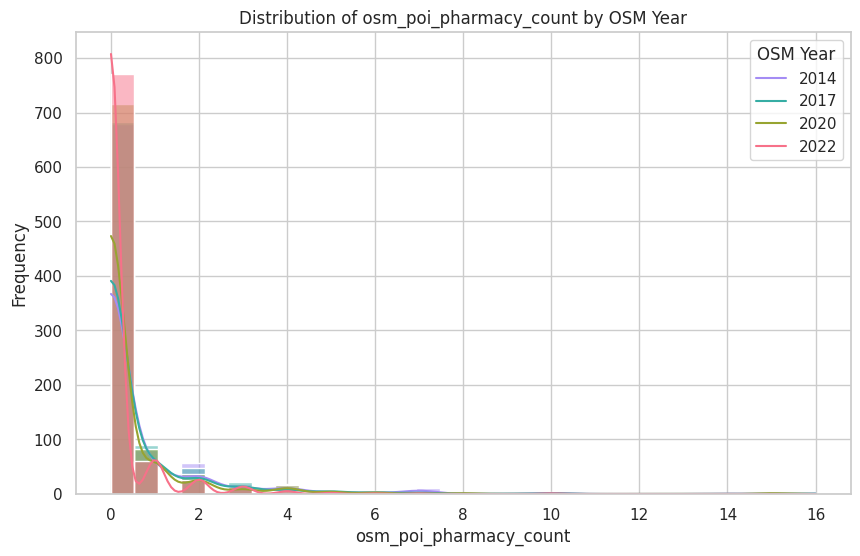

In [10]:
compare_feature("osm_poi_pharmacy_count", bins=30)

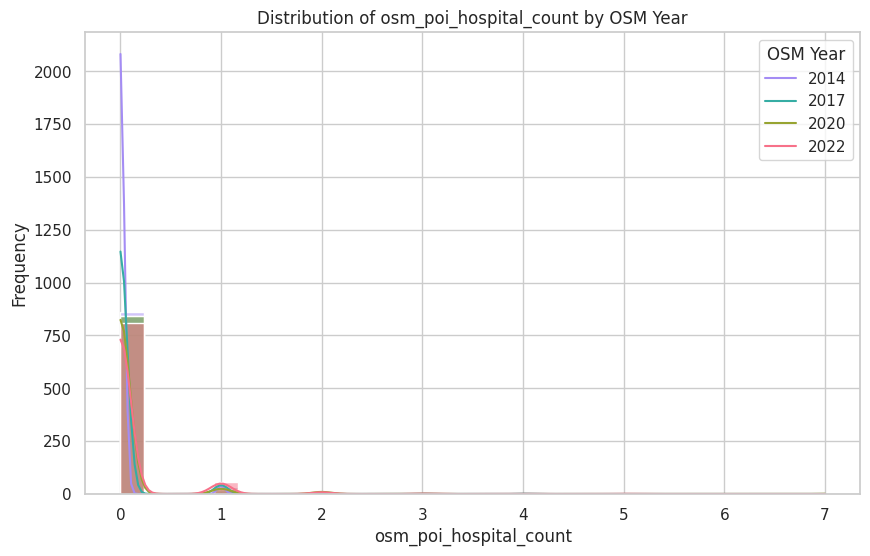

In [11]:
compare_feature("osm_poi_hospital_count", bins=30)

In [12]:
combined_df.shape

(3516, 126)

In [13]:
# experiment to remove the zeroes
sorted_df = combined_df.sort_values(by="poi_count", ascending=False)
sorted_df

,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,ADM3_EN,ADM3_PCODE,ADM4_EN,ADM4_PCODE,osm_year,poi_count,osm_poi_clinic_count,osm_poi_clinic_nearest,osm_poi_dentist_count,osm_poi_dentist_nearest,osm_poi_doctors_count,osm_poi_doctors_nearest,osm_poi_hospital_count,osm_poi_hospital_nearest,osm_poi_optician_count,osm_poi_optician_nearest,osm_poi_pharmacy_count,osm_poi_pharmacy_nearest,osm_poi_atm_count,osm_poi_atm_nearest,osm_poi_bank_count,osm_poi_bank_nearest,osm_poi_college_count,osm_poi_college_nearest,osm_poi_community_centre_count,osm_poi_community_centre_nearest,osm_poi_comms_tower_count,osm_poi_comms_tower_nearest,osm_poi_convenience_count,osm_poi_convenience_nearest,osm_poi_fire_station_count,osm_poi_fire_station_nearest,osm_poi_kindergarten_count,osm_poi_kindergarten_nearest,osm_poi_lighthouse_count,osm_poi_lighthouse_nearest,osm_poi_market_place_count,osm_poi_market_place_nearest,osm_poi_park_count,osm_poi_park_nearest,osm_poi_public_building_count,osm_poi_public_building_nearest,osm_poi_police_count,osm_poi_police_nearest,osm_poi_school_count,osm_poi_school_nearest,osm_poi_shelter_count,osm_poi_shelter_nearest,osm_poi_supermarket_count,osm_poi_supermarket_nearest,osm_poi_telephone_count,osm_poi_telephone_nearest,osm_poi_tower_count,osm_poi_tower_nearest,osm_poi_town_hall_count,osm_poi_town_hall_nearest,osm_poi_university_count,osm_poi_university_nearest,osm_poi_cable_count,osm_poi_cable_nearest,osm_poi_compensator_count,osm_poi_compensator_nearest,osm_poi_connection_count,osm_poi_connection_nearest,osm_poi_converter_count,osm_poi_converter_nearest,osm_poi_generator_count,osm_poi_generator_nearest,osm_poi_insulator_count,osm_poi_insulator_nearest,osm_poi_line_count,osm_poi_line_nearest,osm_poi_busbar_count,osm_poi_busbar_nearest,osm_poi_bay_count,osm_poi_bay_nearest,osm_poi_minor_line_count,osm_poi_minor_line_nearest,osm_poi_plant_count,osm_poi_plant_nearest,osm_poi_pole_count,osm_poi_pole_nearest,osm_poi_portal_count,osm_poi_portal_nearest,osm_poi_substation_count,osm_poi_substation_nearest,osm_poi_tower_count_y,osm_poi_tower_nearest_y,osm_poi_transformer_count,osm_poi_transformer_nearest,osm_poi_exchange_count,osm_poi_exchange_nearest,osm_poi_connection_point_count,osm_poi_connection_point_nearest,osm_poi_distribution_point_count,osm_poi_distribution_point_nearest,osm_poi_service_device_count,osm_poi_service_device_nearest,osm_poi_data_center_count,osm_poi_data_center_nearest,osm_poi_drinking_water_count,osm_poi_drinking_water_nearest,osm_poi_water_mill_count,osm_poi_water_mill_nearest,osm_poi_water_tower_count,osm_poi_water_tower_nearest,osm_poi_water_works_count,osm_poi_water_works_nearest,osm_poi_water_well_count,osm_poi_water_well_nearest,osm_poi_sanitary_dump_station_count,osm_poi_sanitary_dump_station_nearest,osm_poi_toilet_count,osm_poi_toilet_nearest,osm_poi_recycling_count,osm_poi_recycling_nearest,osm_poi_waste_basket_count,osm_poi_waste_basket_nearest,osm_poi_wastewater_plant_count,osm_poi_wastewater_plant_nearest,osm_poi_waste_transfer_station_count,osm_poi_waste_transfer_station_nearest
137,National Capital Region,PH130000000,"NCR, Fourth District",PH137600000,City of Muntinlupa,PH137603000,Alabang,PH137603001,2022,373.0,0.0,10000.0,3.0,0.000000,5.0,0.0,1.0,0.000000,4.0,0.000000,16.0,0.000000,3.0,0.000000,33.0,0.000000,0.0,793.214986,0.0,951.609018,0.0,1702.531920,20.0,0.000000,0.0,2374.504405,0.0,594.987730,0.0,10000.000000,1.0,0.0,0.0,4619.571425,0.0,2274.396583,1.0,0.000000,2.0,0.000000,0.0,2416.647960,6.0,0.000000,0.0,6068.156485,0.0,6607.575128,0.0,737.601445,0.0,4453.593847,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,6607.575128,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000,0.0,10000.0,1.0,0.000000,0.0,10000.000000,0.0,4656.917219,0.0,10000.0,13.0,0.000000,0.0,3534.852780,0.0,10000.000000,0.0,10000.000000,0.0,10000.0
137,National Capital R

In [14]:
group_region = combined_df.groupby(["ADM1_EN"])["ADM3_EN"].value_counts()
group_region

ADM1_EN                  ADM3_EN            
National Capital Region  City of Mandaluyong    108
                         City of Navotas         56
                         City of Muntinlupa      36
Region I                 Dagupan City           124
Region III               Palayan City            76
Region IX                Zamboanga City         404
Region V                 Legazpi City           280
Region VI                Iloilo City            720
Region VII               Mandaue City           108
Region VIII              Tacloban City          552
Region X                 Cagayan de Oro City    320
Region XI                Davao City             732
Name: ADM3_EN, dtype: int64

In [15]:
# city sample_dfs
ncr = combined_df[combined_df["ADM1_EN"] == "National Capital Region"]
davao = combined_df[combined_df["ADM3_EN"] == "Davao City"]
dagupan = combined_df[combined_df["ADM3_EN"] == "Dagupan City"]
iloilo = combined_df[combined_df["ADM3_EN"] == "Iloilo City"]

/tmp/ipykernel_284/1439663545.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for region, group in group_region_dfs:


National Capital Region


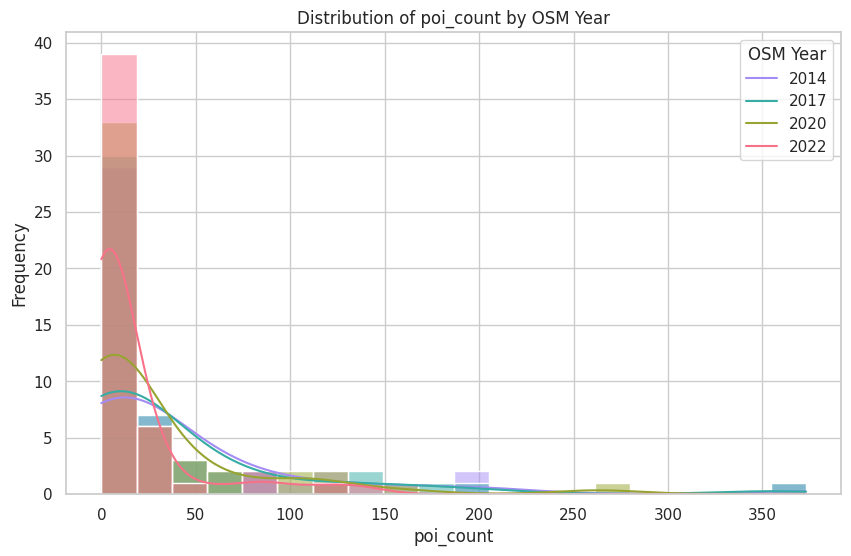

Region I


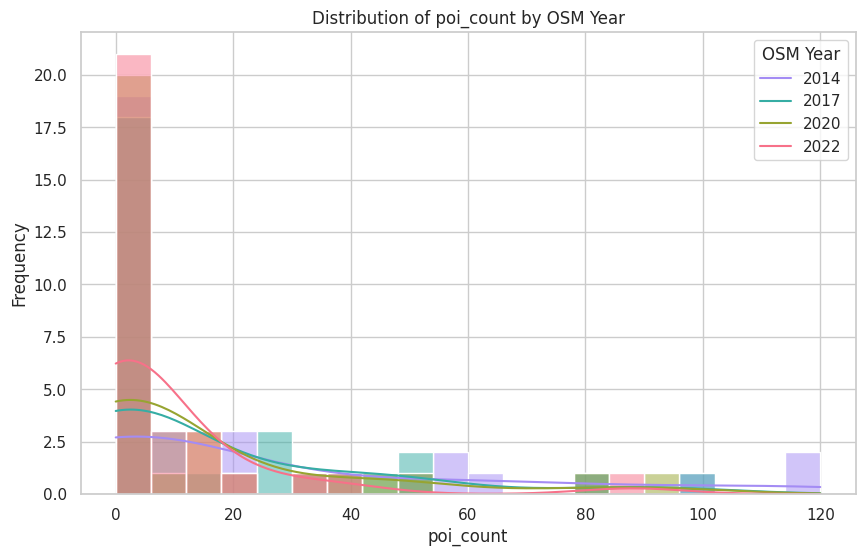

Region III


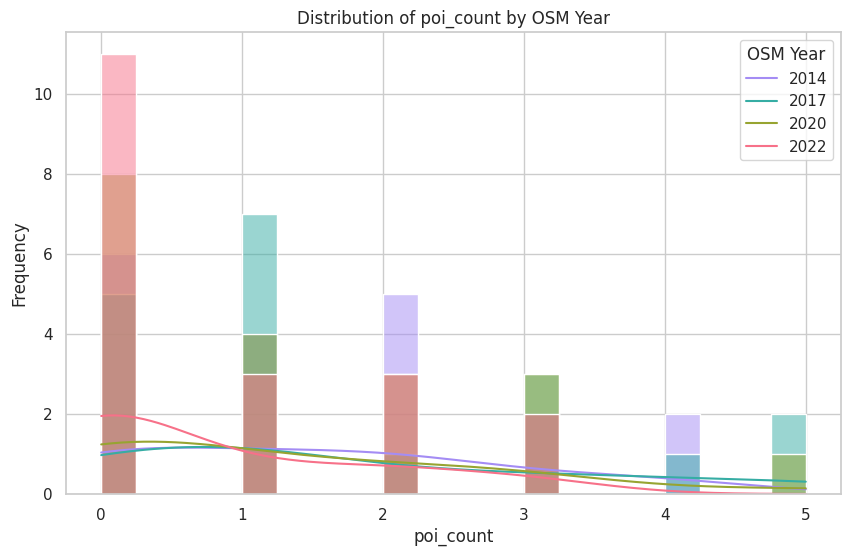

Region IX


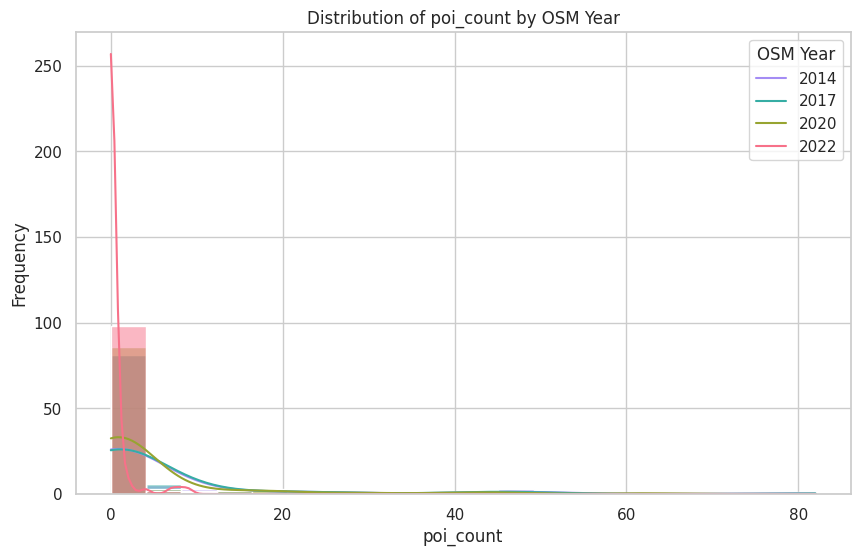

Region V


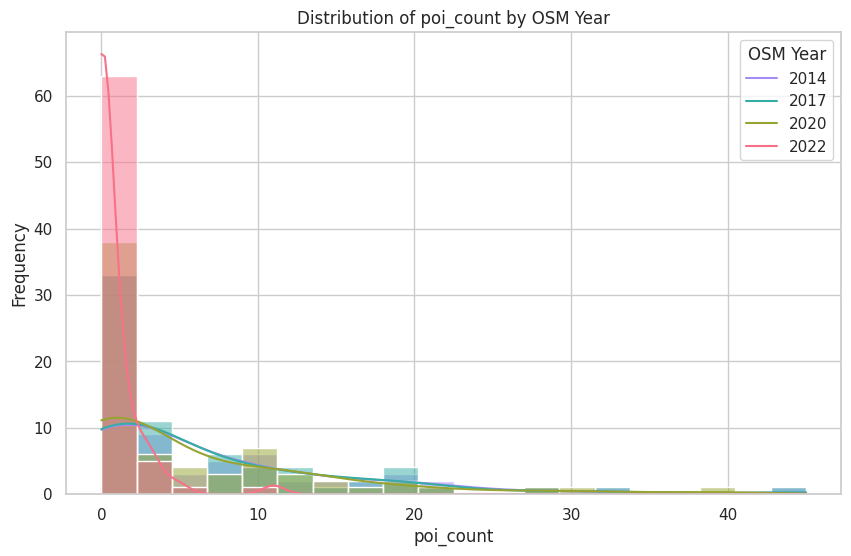

Region VI


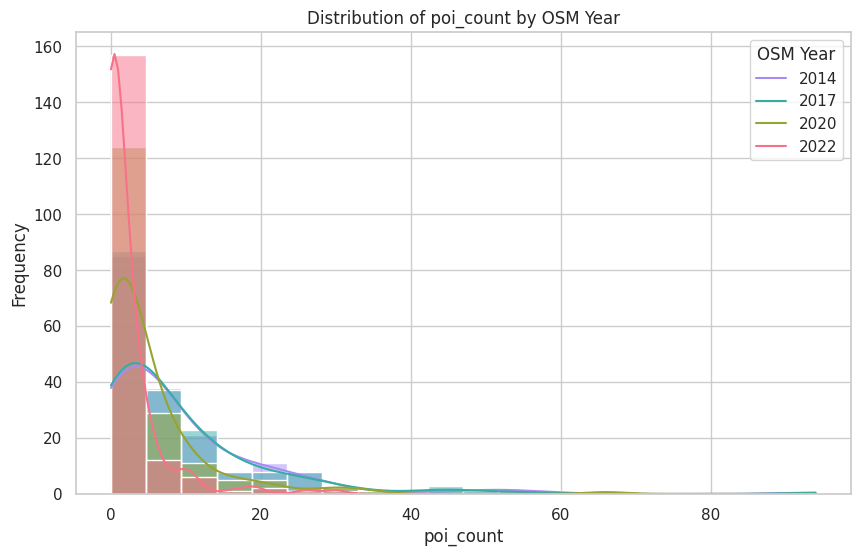

Region VII


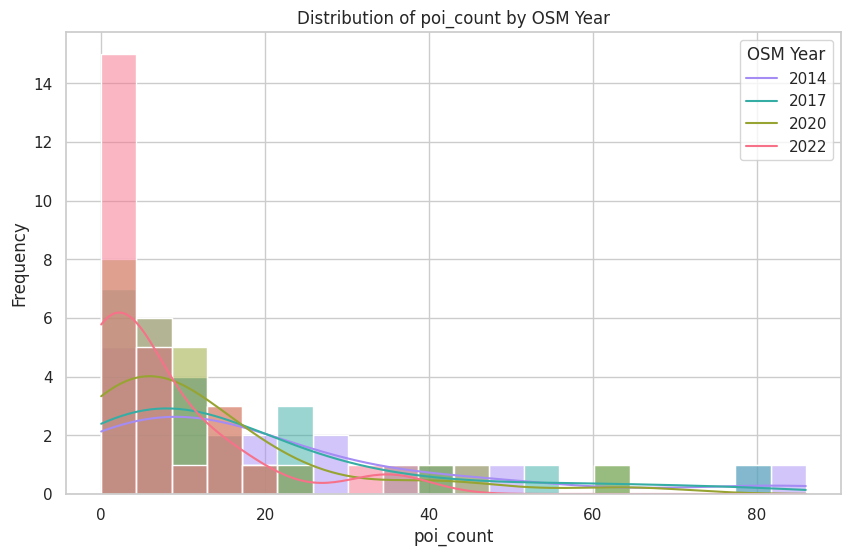

Region VIII


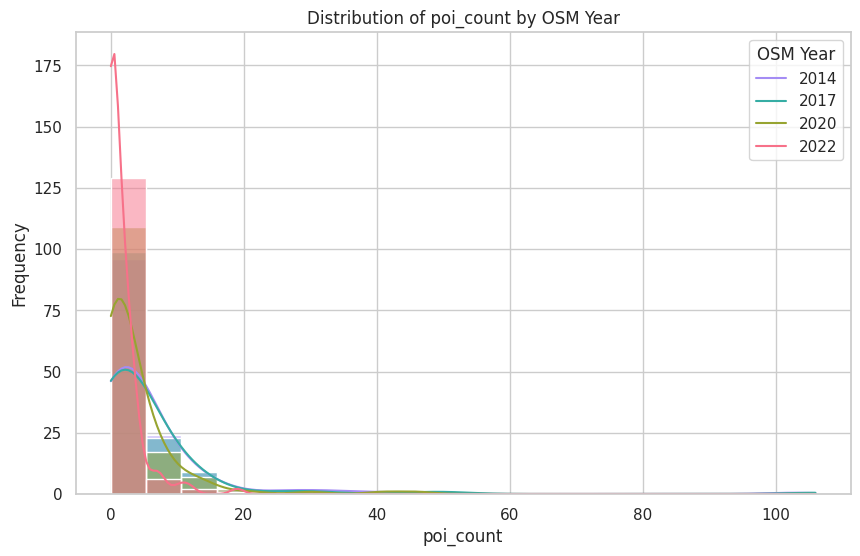

Region X


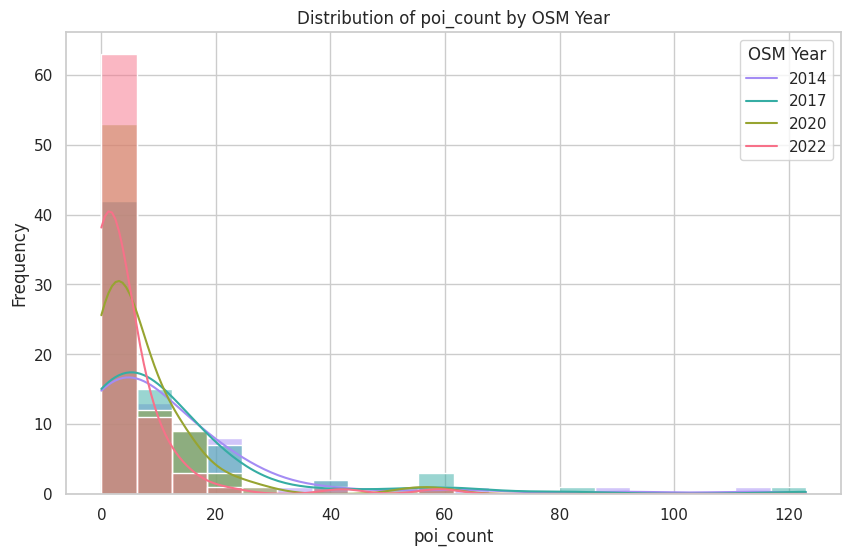

Region XI


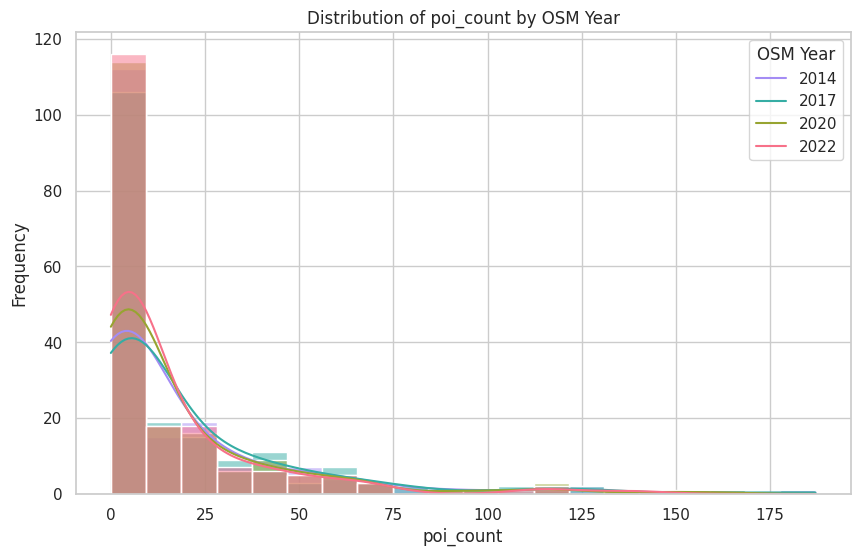

In [16]:
group_region_dfs = combined_df.groupby(["ADM1_EN"])

for region, group in group_region_dfs:
    print(region)
    compare_feature(
        "poi_count",
        df=group,
        bins=20,
    )

## Visualize hospital decrease

In [17]:
osm = geofabrik.OsmDataManager(cache_dir=RAW_DIR)
raw_2022 = osm.load_pois(region="philippines", year="2022", use_cache=True)
raw_2022 = raw_2022[raw_2022["fclass"] == "hospital"]
raw_2022.head(2)

2023-12-01 17:00:11.974 | INFO     | geowrangler.datasets.geofabrik:download_osm_region_data:128 - OSM Data: Cached data available for philippines at ../../../data/02-raw/osm/philippines-220101-free.shp.zip? True
2023-12-01 17:00:11.976 | DEBUG    | geowrangler.datasets.geofabrik:load_pois:222 - OSM POIs for philippines and year 2022 being loaded from ../../../data/02-raw/osm/philippines-220101-free.shp.zip


,osm_id,code,fclass,name,geometry
46,25389198,2110,hospital,Protacio Hospital,POINT (120.99658 14.52419)
90,25750824,2110,hospital,Ibajay District Hospital,POINT (122.15377 11.81162)


In [18]:
raw_2017 = osm.load_pois(region="philippines", year="2017", use_cache=True)
raw_2017 = raw_2017[raw_2017["fclass"] == "hospital"]
raw_2017.head(2)

2023-12-01 17:00:14.779 | INFO     | geowrangler.datasets.geofabrik:download_osm_region_data:128 - OSM Data: Cached data available for philippines at ../../../data/02-raw/osm/philippines-170101-free.shp.zip? True
2023-12-01 17:00:14.781 | DEBUG    | geowrangler.datasets.geofabrik:load_pois:222 - OSM POIs for philippines and year 2017 being loaded from ../../../data/02-raw/osm/philippines-170101-free.shp.zip


,osm_id,code,fclass,name,geometry
52,25389198,2110,hospital,Protacio Hospital,POINT (120.99658 14.52419)
76,25677559,2110,hospital,Donsol Health Center,POINT (123.59652 12.90585)


In [19]:
# Set map center
gdf_centroid_lat, gdf_centroid_lon = (
    raw_2022.geometry.y.mean(),
    raw_2022.geometry.x.mean(),
)

In [20]:
map = folium.Map(
    location=[gdf_centroid_lat, gdf_centroid_lon],
    zoom_start=7,
    control_scale=True,
    tiles="cartodb positron",
)

raw_2017.explore(m=map, color="red")
raw_2022.explore(m=map, color="blue")


map